In [1]:
import numpy as np
import pandas as pd
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go# Get unique years and players
import matplotlib.pyplot as plt

from catan_functions import fit_excel_into_df
from catan_functions import create_hover_data

import re

In [2]:
data = fit_excel_into_df("catan_data.xlsx")

# resource list
resources = []
for rescol in [col for col in data if "share_" in col]:
    resources.append(rescol[6:])
resources

C:\Users\maxfu\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\maxfu\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


['wood', 'clay', 'sheep', 'grain', 'ore', 'paper', 'coin', 'fabric']

In [3]:
data[["place"] + [col for col in data if "p_sum_" in col] + [col for col in data if "share_" in col]].groupby(["place"]).agg("mean")

,p_sum_wood,p_sum_clay,p_sum_sheep,p_sum_grain,p_sum_ore,p_sum_paper,p_sum_coin,p_sum_fabric,share_wood,share_clay,share_sheep,share_grain,share_ore,share_paper,share_coin,share_fabric
place,,,,,,,,,,,,,,,,
1,4.694915,4.313559,4.559322,5.898305,4.415254,2.805085,2.237288,2.610169,0.328076,0.305715,0.361909,0.314234,0.361845,0.359047,0.405766,0.365657
2,4.949153,5.152542,4.050847,6.983051,3.796610,2.813559,1.686441,2.305085,0.351411,0.335082,0.312687,0.357488,0.323929,0.361537,0.279109,0.305722
3,4.677966,5.398305,4.338983,6.559322,3.932203,2.440678,1.703390,2.432203,0.320512,0.359203,0.325404,0.328277,0.314226,0.279416,0.315126,0.328621


In [4]:
data[["player","season","score"]].groupby(["season","player"]).agg(["sum","mean"])

score           
                sum       mean
season player                 
2022   JHC      307  10.233333
       MF       254   8.466667
       PF       314  10.466667
2023   JHC      210   9.545455
       MF       178   8.090909
       PF       222  10.090909
2024   JHC      444   9.866667
       MF       432        9.6
       PF       434   9.644444
2025   JHC      185   8.043478
       MF       203   8.826087
       PF       263  11.434783

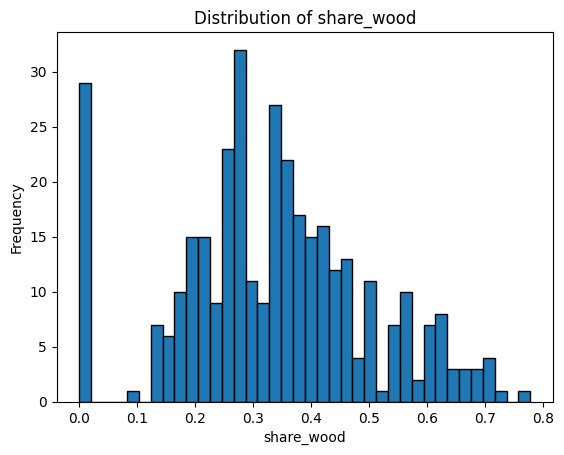

In [5]:
%matplotlib inline

histcol = "share_wood"
bincalc = int(data[histcol].max() * 50) if data[histcol].dtype==float else int(data[histcol].max())

# Option 2: Using the plot method
data[histcol].plot(kind='hist', bins=bincalc, edgecolor='black')
plt.xlabel(histcol)
plt.ylabel("Frequency")
plt.title(f"Distribution of {histcol}")
plt.show()


In [6]:
df_p = data[["season", "player"] + [col for col in data if "p_sum_" in col]].groupby(["season", "player"]).mean()
df_p = df_p.rename(columns = {col:col[6:] for col in df_p})

In [7]:
import streamlit as st

# Style the DataFrame with a green-to-red gradient
styled_df = df_p.style.background_gradient(cmap='RdYlGn')
#st.write(styled_df)
styled_df

In [8]:
# Group and aggregate the data
df_p = data[["season", "player"] + [col for col in data if "p_sum_" in col]].groupby(["season", "player"]).mean()
df_p = df_p.rename(columns = {col:col[6:] for col in df_p})
###### the following not for display, just calculating a table with season shares
df_t_calc = data[["season", "player"] + [col for col in data if "t_sum_" in col]].groupby(["season", "player"]).mean()
df_t_calc = df_t_calc.rename(columns = {col:col[6:] for col in df_t_calc})
# Now perform elementwise division
ratio_df = df_p / df_t_calc
######### this one for display:
df_t = data[["season"] + [col for col in data if "t_sum_" in col]].groupby(["season"]).mean()
df_t = df_t.rename(columns = {col:col[6:] for col in df_t})

styled_df_p = df_p.style.background_gradient(cmap='RdYlGn')
styled_df_t = df_t.style.background_gradient(cmap='RdYlGn')
styled_ratio_df = ratio_df.style.background_gradient(cmap='RdYlGn').format("{:.1%}")


In [9]:
styled_ratio_df

In [10]:
share_df = data[["season", "player"] + [col for col in data if "share_" in col]].groupby(["season", "player"]).mean()


share_df = share_df.rename(columns = {col:col[6:] for col in share_df})
share_df = share_df.style.background_gradient(cmap='RdYlGn').format("{:.1%}")

In [11]:
share_df

In [12]:
# Group and aggregate the data
df_p = data[["season", "player"] + [col for col in data if "p_sum_" in col]].groupby(["season", "player"]).sum()
df_t = data[["season", "player"] + [col for col in data if "t_sum_" in col]].groupby(["season", "player"]).sum()

# Rename the columns in df_t to match those in df_p
df_t.rename(columns=lambda col: col.replace("t_sum_", "p_sum_") if "t_sum_" in col else col, inplace=True)

# Now perform elementwise division
ratio_df = df_p / df_t

print(ratio_df)


               p_sum_wood  p_sum_clay  p_sum_sheep  p_sum_grain  p_sum_ore  \
season player                                                                
2022   JHC       0.336245    0.341523     0.350000     0.310757   0.368421   
       MF        0.364629    0.361179     0.310526     0.328685   0.297214   
       PF        0.299127    0.297297     0.339474     0.360558   0.334365   
2023   JHC       0.381107    0.365031     0.242424     0.400498   0.299595   
       MF        0.296417    0.306748     0.424242     0.288557   0.315789   
       PF        0.322476    0.328221     0.333333     0.310945   0.384615   
2024   JHC       0.315615    0.448951     0.273950     0.367647   0.341772   
       MF        0.327243    0.282517     0.332773     0.351810   0.305606   
       PF        0.357143    0.268531     0.393277     0.280543   0.352622   
2025   JHC       0.356037    0.372549     0.294118     0.353755   0.329032   
       MF        0.334365    0.281046     0.297578     0.428854 

In [13]:
df_p_loc = data[["season", "player","loc","score"] + [col for col in data if "p_sum_" in col]].groupby(["season", "player","loc"]).mean()
df_p_loc.style.background_gradient(cmap='RdYlGn')

In [14]:
data

,season,Session,game,loc,geoloc,player,score,special,place,position,...,share_clay,share_sheep,share_grain,share_ore,share_paper,share_coin,share_fabric,points,points_cum,points_cum_ytd
1,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",PF,7,NaN,2,first,...,0.266667,0.363636,0.555556,0.384615,0.0,0.000,0.363636,1,1,1
2,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",MF,14,NaN,1,second,...,0.200000,0.000000,0.296296,0.230769,1.0,1.000,0.000000,2,2,2
3,2022,2022-03-19 00:00:00,1,Husum (Memeler Str.),"54.491864, 9.030382",JHC,5,NaN,3,third,...,0.533333,0.636364,0.148148,0.384615,0.0,0.000,0.636364,0,0,0
4,2022,2022-03-19 00:00:00,2,Husum (Memeler Str.),"54.491864, 9.030382",JHC,7,NaN,2,first,...,0.250000,0.200000,0.578947,0.230769,0.0,0.500,0.333333,1,1,1
5,2022,2022-03-19 00:00:00,2,Husum (Memeler Str.),"54.491864, 9.030382",MF,13,NaN,1,second,...,0.500000,0.800000,0.105263,0.538462,0.0,0.000,0.666667,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2025,2025-11-21 00:00:00,22,Husum (Memeler Str.),"54.491864, 9.030382",JHC,10,2,2,first,...,1.000000,0.400000,0.272727,0.200000,0.5,0.000,1.000000,1,120,17
357,2025,2025-11-21 00:00:00,22,Husum (Memeler Str.),"54.491864, 9.030382",PF,14,8,1,third,...,0.000000,0.600000,0.181818,0.200000,0.5,0.375,0.000000,2,141,31
359,2025,2025-11-21 00:00:00,23,Husum (Memeler Str.),"54.491864, 9.030382",JHC,13,3,1,second,...,0.428571,0.142857,0.718750,0.000000,0.0,0.000,0.181818,2,122,19
358,2025,2025-11-21 00:00:00,23,Husum (Memeler Str.),"54.491864, 9.030382",MF,11,4,3,first,...,0.000000,0.285714,0.125000,0.692308,1.0,0.500,0.090909,0,96,18
